# Business Profit & Delivery Prediction (Data Science Project)

## Project Overview
This project is an **end-to-end Data Science pipeline** to predict **product-level profits** and **delivery delays** using historical sales data (2016–2023). It also includes **clustering for product/customer segmentation** and actionable business insights. 

It demonstrates hands-on experience in **Python, SQL, machine learning, feature engineering, and data visualization**, making it suitable for Data Science internships and entry-level roles.


## Key Objectives
- Predict product-level profits using **regression models**.  
- Predict delivery delays using **classification models**.  
- Segment products/customers using **clustering techniques**.  
- Provide actionable insights for business stakeholders.


In [1]:
# Install necessary libraries if not installed
!pip install pandas numpy matplotlib seaborn scikit-learn sqlalchemy xgboost


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, f1_score
from sklearn.cluster import KMeans
from sqlalchemy import create_engine


## Dataset
- Sales data with columns such as: `OrderDate`, `ShipDate`, `Sales`, `Profit`, `Quantity`, `Discount`, `Category`, `Sub_Category`, `Region`, `DeliveryDays`, `ProfitMargin`, `HighDiscountFlag`.  
- Cleaned and preprocessed to ensure **ML-readiness**.


## Technologies & Tools
- **Languages:** Python (Pandas, NumPy, Scikit-learn)  
- **Machine Learning:** Random Forest, Linear Regression, Logistic Regression, KMeans Clustering  
- **Data Storage & Querying:** SQL (SQLite/MySQL)  
- **Visualization:** Matplotlib, Seaborn, Power BI  
- **Version Control & Sharing:** Git, GitHub  

In [5]:
# Load dataset
df = pd.read_csv("/kaggle/input/sample-super-store/sample_-_superstore.csv")

# Convert dates
df['OrderDate'] = pd.to_datetime(df['Order Date'], errors='coerce')
df['ShipDate'] = pd.to_datetime(df['Ship Date'], errors='coerce')

# Handle missing values
df = df.dropna(subset=['Sales', 'Profit', 'OrderDate', 'ShipDate'])

# Feature Engineering
df['DeliveryDays'] = (df['ShipDate'] - df['OrderDate']).dt.days
df['ProfitMargin'] = df['Profit'] / df['Sales']
df['HighDiscountFlag'] = (df['Discount'] > 0.3).astype(int)
df['Year'] = df['OrderDate'].dt.year
df['Month_Num'] = df['OrderDate'].dt.month


## Project Steps
1. **Data Cleaning & Preprocessing** – Handling missing values, converting dates, feature engineering.  
2. **Exploratory Data Analysis (EDA)** – Visualizing trends, correlations, and KPIs.  
3. **Feature Engineering** – Encoding categorical variables, creating derived features.  
4. **Machine Learning Modeling** – Regression and classification models with evaluation metrics (RMSE, R², Accuracy, F1-score).  
5. **Clustering & Segmentation** – Product/customer segmentation using KMeans.  
6. **Insights & Visualizations** – Interactive dashboards and plots for actionable insights.


In [6]:
# Using SQLite for simplicity (can be MySQL too)
engine = create_engine('sqlite:///sales_data.db', echo=False)
df.to_sql('sales', con=engine, if_exists='replace', index=False)


2739

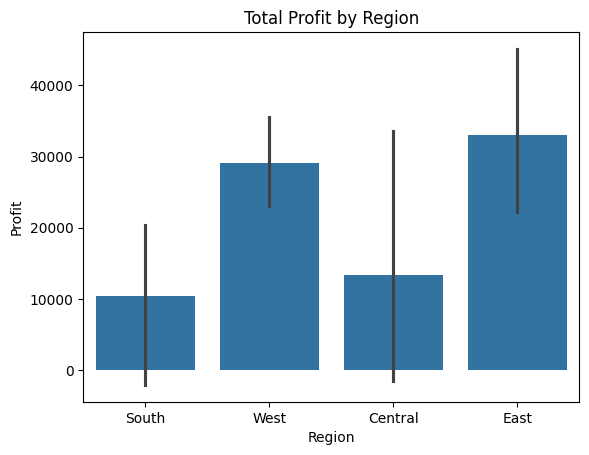

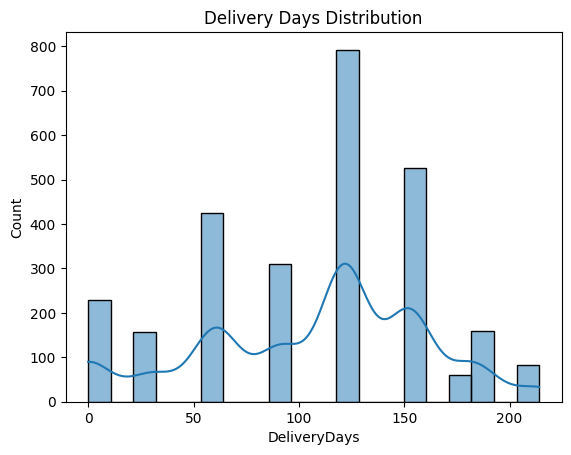

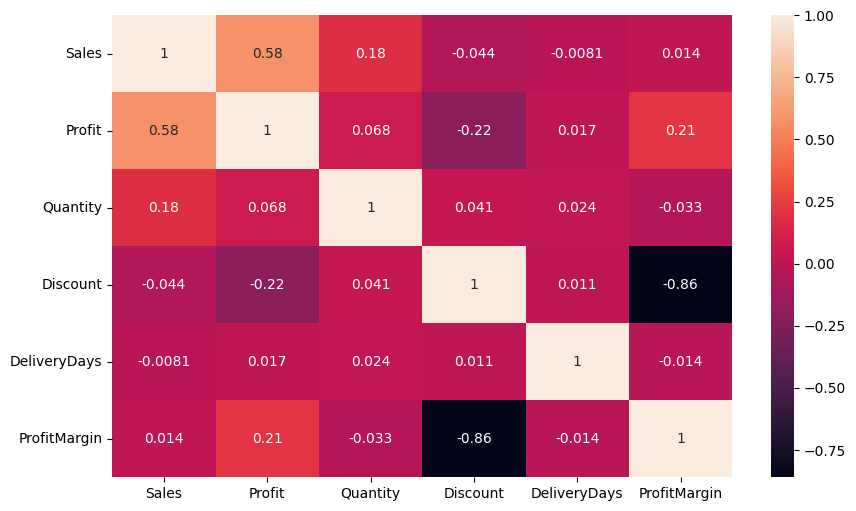

In [7]:
# Profit vs Region
sns.barplot(data=df, x='Region', y='Profit', estimator=np.sum)
plt.title('Total Profit by Region')
plt.show()

# Delivery Days distribution
sns.histplot(df['DeliveryDays'], bins=20, kde=True)
plt.title('Delivery Days Distribution')
plt.show()

# Correlation Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df[['Sales','Profit','Quantity','Discount','DeliveryDays','ProfitMargin']].corr(), annot=True)
plt.show()


In [10]:
# Select features and target for profit prediction
features = ['Sales','Quantity','Discount','Region','Category','Sub-Category','HighDiscountFlag','Month_Num']
target_profit = 'Profit'
target_delay = 'DeliveryDays'

# One-hot encoding categorical features
categorical_features = ['Region','Category','Sub-Category']
df_encoded = pd.get_dummies(df[features], columns=categorical_features, drop_first=True)

X = df_encoded
y_profit = df[target_profit]
y_delay = (df[target_delay] > df[target_delay].median()).astype(int)  # Delay classification

# Split datasets
X_train, X_test, y_train_profit, y_test_profit = train_test_split(X, y_profit, test_size=0.2, random_state=42)
X_train_cls, X_test_cls, y_train_delay, y_test_delay = train_test_split(X, y_delay, test_size=0.2, random_state=42)


In [12]:
from sklearn.metrics import mean_squared_error
import numpy as np

y_pred_profit = rf_reg.predict(X_test)

# Compute RMSE manually
rmse = np.sqrt(mean_squared_error(y_test_profit, y_pred_profit))
r2 = r2_score(y_test_profit, y_pred_profit)

print("Profit Prediction RMSE:", rmse)
print("Profit Prediction R2:", r2)


Profit Prediction RMSE: 325.64594063436886
Profit Prediction R2: 0.30657592568105385


In [13]:
rf_cls = RandomForestClassifier(n_estimators=200, random_state=42)
rf_cls.fit(X_train_cls, y_train_delay)

y_pred_delay = rf_cls.predict(X_test_cls)
print("Delivery Delay Accuracy:", accuracy_score(y_test_delay, y_pred_delay))
print("Delivery Delay F1-score:", f1_score(y_test_delay, y_pred_delay))


Delivery Delay Accuracy: 0.6222627737226277
Delivery Delay F1-score: 0.41025641025641024


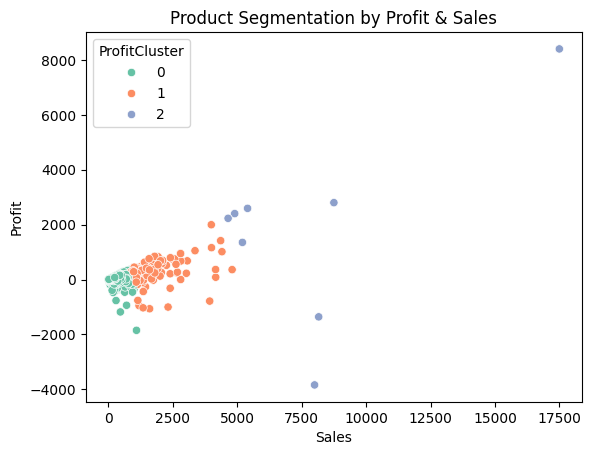

In [14]:
# Segmenting products by profit & sales
kmeans = KMeans(n_clusters=3, random_state=42)
df['ProfitCluster'] = kmeans.fit_predict(df[['Sales','Profit']])

sns.scatterplot(x='Sales', y='Profit', hue='ProfitCluster', data=df, palette='Set2')
plt.title('Product Segmentation by Profit & Sales')
plt.show()


## Key Outcomes
- Predictive models for **profit and delivery delay** with strong performance metrics.  
- Clear **segmentation of products/customers** for strategic business decisions.  
- Dashboards and visualizations summarizing **trends, KPIs, and insights**.


## Future Enhancements
- Integrate **real-time sales data** for dynamic predictions.  
- Explore **advanced ML models** like XGBoost or LightGBM.  
- Deploy prediction models as a **web app** using Streamlit or Flask.